#### GRASP SOLUTION VS DATASETS ENTRY POINTS

In [19]:
import matplotlib.pyplot as plt
from pathlib import PurePath

def read_rsus(file: PurePath):

    rsus = []
    with open(file=file, mode="r") as f:

        for line in f.readlines():
            rsus.append(tuple(map(int, line.strip().split(","))))

    return rsus

"""""
# markers arguments (colors, sizes and styles) lists order: 
# 1 - cells;
# 2 - rsus; 
# 3 - covered cells;
# if there is a rsu within a cell, the cell is drawn first (with covered style), then the rsu;
"""""
def draw_grid_cells_and_rsus(title: str, cells: list[tuple], rsus: list[tuple],
                             cells_set_name: str, rsus_set_name: str, covered_cells_set_name: str,
                             markers_colors: list[str],
                             markers_sizes: list[int],
                             markers_styles: list[str],
                             figsize: tuple, x_label: str, y_label: str, fontsize: str,
                             marker_legend_size: int, legend_fontsize: str,
                             grid_left_x_lim: int, grid_right_x_lim: int,
                             grid_low_y_lim: int, grid_top_y_lim: int,
                             grid: bool = False, save_file_path: str = None):
    
    fig, ax = plt.subplots(figsize=figsize)

    if grid:
        for x in range(int(grid_left_x_lim), int(grid_right_x_lim) + 1):
            ax.axvline(x=x, color='gray', linewidth=0.5, linestyle="--", alpha=0.5)
        for y in range(int(grid_low_y_lim), int(grid_top_y_lim) + 1):
            ax.axhline(y=y, color='gray', linewidth=0.5, linestyle="--", alpha=0.5)

    all_cells = set(cells) | set(rsus)
    intersection = set(cells) & set(rsus)

    scatter1 = ax.scatter([], [], color=markers_colors[0], s=marker_legend_size, label=cells_set_name, marker=markers_styles[0])
    scatter2 = ax.scatter([], [], color=markers_colors[1], s=marker_legend_size, label=rsus_set_name, marker=markers_styles[1])
    scatter1 = ax.scatter([], [], color=markers_colors[2], s=marker_legend_size, label=covered_cells_set_name, marker=markers_styles[2])

    ax.legend(fontsize=legend_fontsize)

    for cell in all_cells:
        x, y = cell

        if cell in intersection:
            ax.scatter(x, y, color=markers_colors[2], s=markers_sizes[2], marker=markers_styles[2], zorder=1)
            ax.scatter(x, y, color=markers_colors[1], s=markers_sizes[1], marker=markers_styles[1], zorder=1)
        else:

            if cell in cells:
                ax.scatter(x, y, color=markers_colors[0], s=markers_sizes[0], marker=markers_styles[0], zorder=1)

            elif cell in rsus:
                ax.scatter(x, y, color=markers_colors[1], s=markers_sizes[1], marker=markers_styles[1], zorder=1)

    ax.set_title(title, wrap=True, fontsize=fontsize)
    ax.set_xlabel(x_label, fontsize=fontsize)
    ax.set_ylabel(y_label, fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)

    ax.set_xlim(grid_left_x_lim, grid_right_x_lim)
    ax.set_ylim(grid_low_y_lim, grid_top_y_lim)

    if not (save_file_path is None):
        plt.savefig(save_file_path)

    plt.show()

    print(f"RECALL: {len(intersection) / len(cells)}")

#### DATASET 1 CELLS FEATURES EXTRACTION

- start_c: number of trajectories starting at the cell

In [15]:
import numpy as np

import pandas as pd
from pathlib import PurePath

df = pd.read_csv(PurePath("..") / '6_to_8am.csv', sep=';', header=None, names=['vehicle_id', 'time', 'x', 'y', 'duration'], index_col=False)
df['duration'] = df['duration'] * 10

df["x:y"] = df["x"].astype("str") + ":" +  df["y"].astype("str")

# Popularity feature is necessary to include indexes of cells which
# do not have trajectories starting in, so they are filled with 0s
cells_df = pd.DataFrame(data={
    "pop": df["x:y"].value_counts(),
    "start_c": df[["vehicle_id", "x:y"]].groupby("vehicle_id").first()["x:y"].value_counts(),
}).fillna(0)

cells_df["start_c"] = cells_df["start_c"].astype(np.int64)

df = df.drop("x:y", axis=1)

#### DATA SET 1 ENTRY POINTS (CELLS WITH "start_c" ABOVE 85TH PERCENTILE) VS GRASP SOLUTION WITH THE SAME NUMBER OF RSUS (TAU = 30)

RECALL (ENCOUNTERED CELLS) BELOW IMAGE

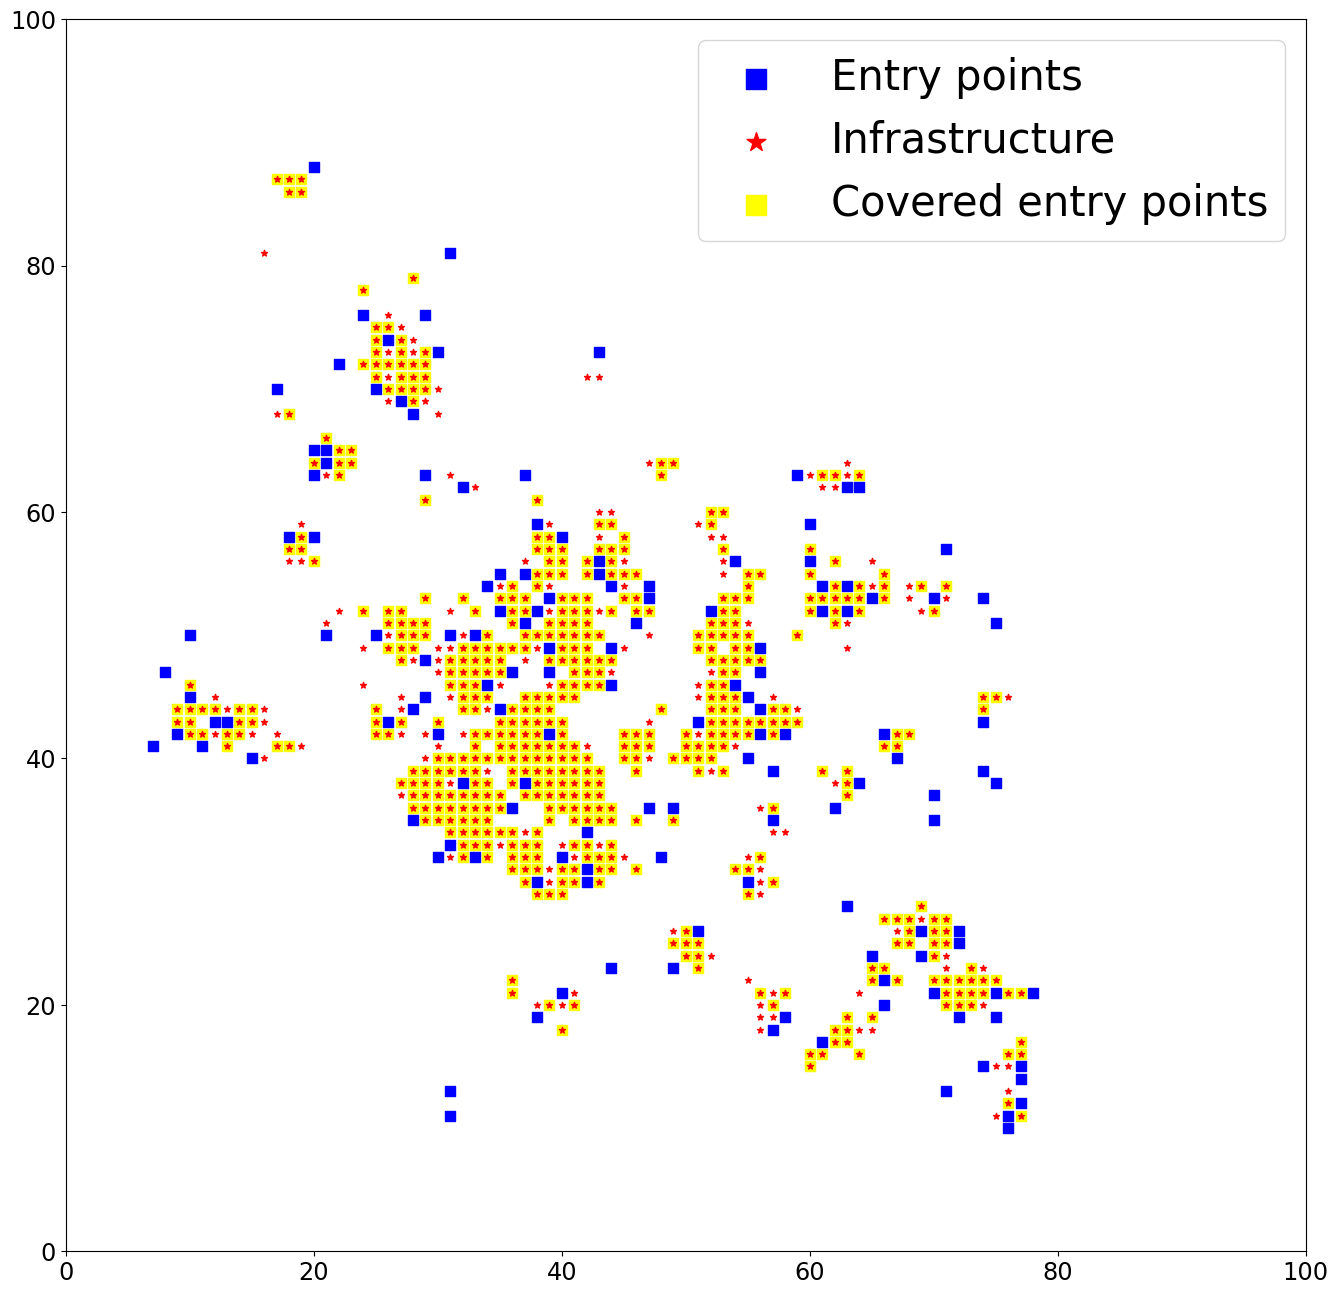

RECALL: 0.7801526717557252


In [21]:
infra = read_rsus("rsu=655_tau=30_rcl=15_iter=1000_cont=1_rsus.csv")

cells_df["x"] = cells_df.index.str.split(":").str[0].astype(int)
cells_df["y"] = cells_df.index.str.split(":").str[1].astype(int)

cells_to_draw = [(x, y) for x, y in cells_df[cells_df["start_c"] >= cells_df["start_c"].quantile(0.85)][["x", "y"]].values]

draw_grid_cells_and_rsus(
    title=f"", 
    cells=cells_to_draw, rsus=infra,
    cells_set_name="Entry points", rsus_set_name="Infrastructure", covered_cells_set_name= "Covered entry points",
    markers_colors=["blue", "red", "yellow"],
    markers_sizes=[50, 20, 50],
    markers_styles=["s", "*", "s"],
    figsize=(16, 16),
    grid_left_x_lim=0, grid_right_x_lim=100, 
    grid_low_y_lim=0, grid_top_y_lim=100,
    x_label="", y_label="", fontsize="xx-large", marker_legend_size=200, legend_fontsize=30,
    save_file_path="1con_vs_entry_points_dataset1.pdf")

cells_df.drop(columns=["x", "y"], inplace=True)

#### DATASET 2 CELLS FEATURES EXTRACTION

- start_c: number of trajectories starting at the cell

In [22]:
import numpy as np

import pandas as pd
from pathlib import PurePath

df = pd.read_csv(PurePath("..") / '5_to_7pm.csv', sep=';', header=None, names=['vehicle_id', 'time', 'x', 'y', 'duration'], index_col=False)
df['duration'] = df['duration'] * 10

df["x:y"] = df["x"].astype("str") + ":" +  df["y"].astype("str")

# Popularity feature is necessary to include indexes of cells which
# do not have trajectories starting in, so they are filled with 0s
cells_df = pd.DataFrame(data={
    "pop": df["x:y"].value_counts(),
    "start_c": df[["vehicle_id", "x:y"]].groupby("vehicle_id").first()["x:y"].value_counts(),
}).fillna(0)

cells_df["start_c"] = cells_df["start_c"].astype(np.int64)

df = df.drop("x:y", axis=1)

#### DATA SET 2 ENTRY POINTS (CELLS WITH "start_c" ABOVE 85TH PERCENTILE) VS GRASP SOLUTION WITH THE SAME NUMBER OF RSUS (TAU = 30)

RECALL (ENCOUNTERED CELLS) BELOW IMAGE

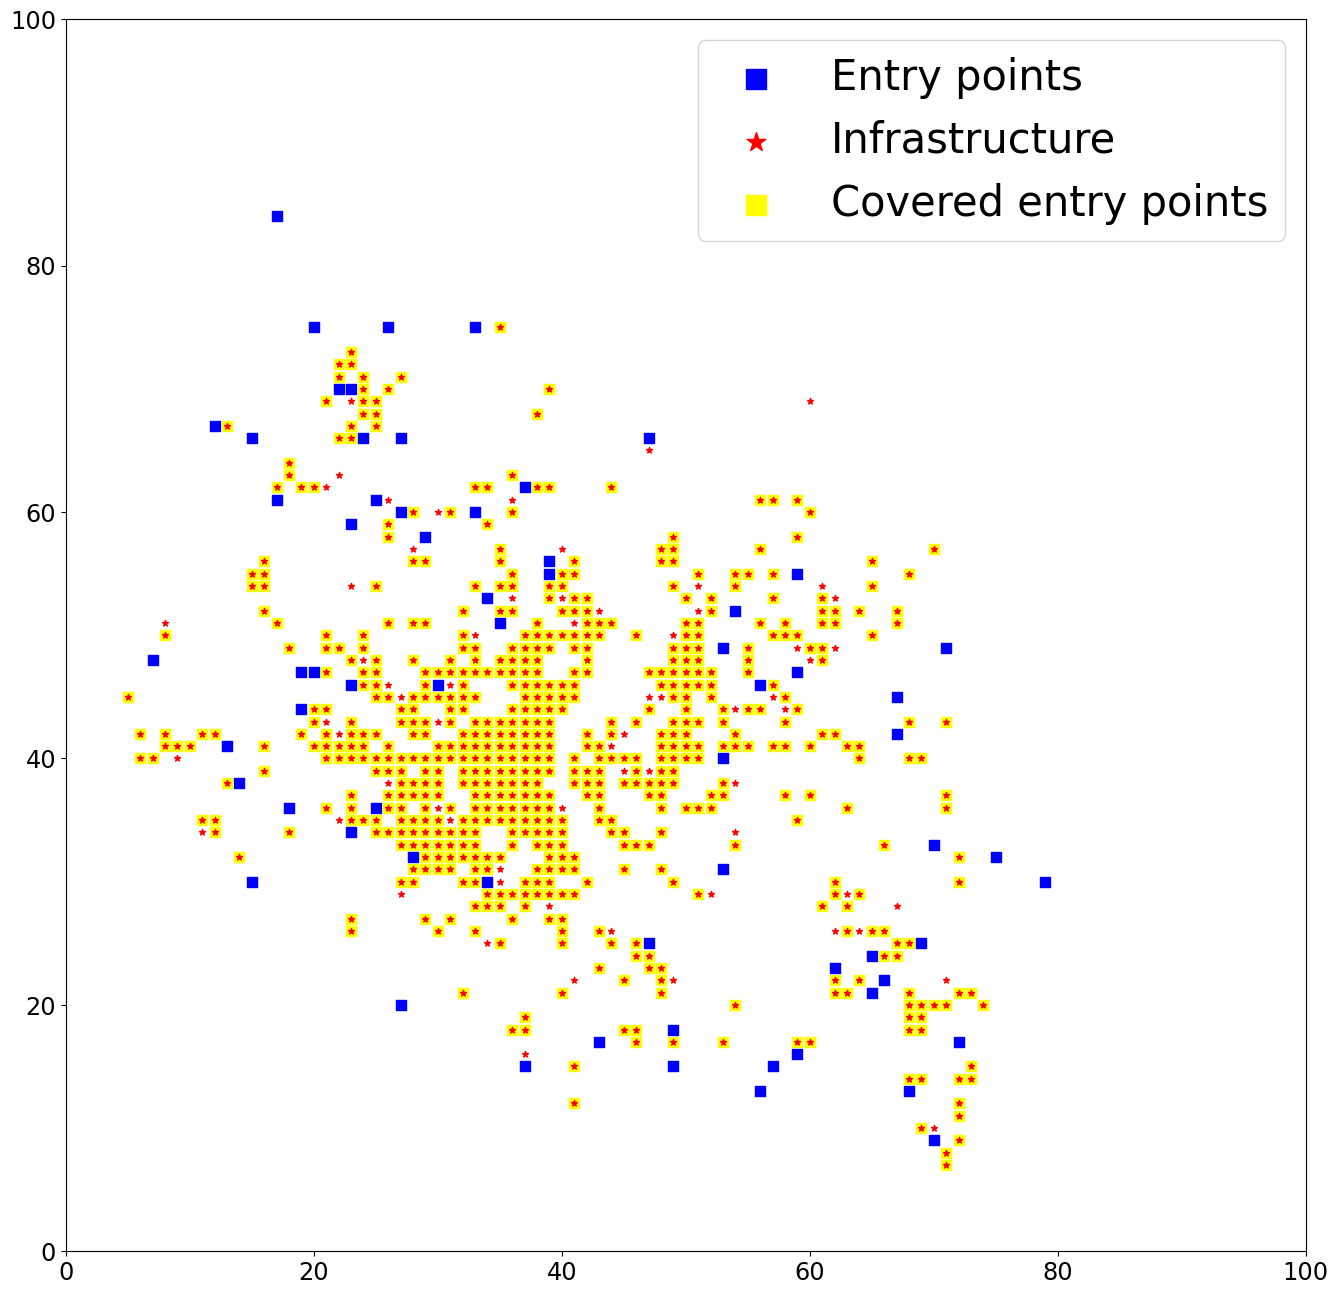

RECALL: 0.9030837004405287


In [25]:
infra = read_rsus("rsu=681_tau=30_rcl=15_iter=100_cont=1_rsus.csv")

cells_df["x"] = cells_df.index.str.split(":").str[0].astype(int)
cells_df["y"] = cells_df.index.str.split(":").str[1].astype(int)

cells_to_draw = [(x, y) for x, y in cells_df[cells_df["start_c"] >= cells_df["start_c"].quantile(0.85)][["x", "y"]].values]

draw_grid_cells_and_rsus(
    title=f"", 
    cells=cells_to_draw, rsus=infra,
    cells_set_name="Entry points", rsus_set_name="Infrastructure", covered_cells_set_name= "Covered entry points",
    markers_colors=["blue", "red", "yellow"],
    markers_sizes=[50, 20, 50],
    markers_styles=["s", "*", "s"],
    figsize=(16, 16),
    grid_left_x_lim=0, grid_right_x_lim=100, 
    grid_low_y_lim=0, grid_top_y_lim=100,
    x_label="", y_label="", fontsize="xx-large", marker_legend_size=200, legend_fontsize=30,
    save_file_path="1con_vs_entry_points_dataset2.pdf")

cells_df.drop(columns=["x", "y"], inplace=True)